<a href="https://colab.research.google.com/github/Piaiai/My-pets/blob/master/tjms_lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.stats import pearsonr
import math
%matplotlib inline

In [ ]:
# функция находит т-критическое
def t(alpha, gl):
    return stats.t.ppf(1-(alpha/2), gl)
  
  
#передавать переменные independent_variable и dependent_variable строковыми литералами(должны содержать названия колонок)
def PrintCorrelationAndSignificance(correlated_df, independent_variable, 
                                    dependent_variable):
  X = correlated_df[independent_variable]
  y = correlated_df[dependent_variable]
  X_mean = X.mean()
  y_mean = y.mean()
  pearson_coef = sum((i - X_mean) * (j - y_mean) for i, j in zip(X, y))\
                 /(len(X) - 1)/(X.std()*y.std()) 
  print('Коэффициент корреляции равен: {0}'.format(pearson_coef))
  T_val = (pearson_coef * math.sqrt(len(X) - 2)) / (math.sqrt(1 - int(pearson_coef** 2)))
  t_critical = t(0.05, len(X) - 2)
  print('Проверяем гипотезу про наличие линейной корреляционной связи:')
  print('H0: Rген = 0 и H1: Rген != 0, где Rген - коэффициент корреляции в генеральной совокупности')
  print('Альфа = 0.05')
  print('t = (r * sqrt(n - 2)/ sqrt(1 - r^2))')
  print('t налблюдаемое = ({0} * sqrt({1})) / sqrt(1 - {0})^2'.format(pearson_coef,
                                                                     len(X) - 2))
  if T_val > t_critical:
    print('Поскольку tнабл={0} >  tкр={1}, нулевую гипотезу отклоняем, линейный коэффициент значимый'.format(T_val, t_critical))
    print('Вывод: гипотеза про наличие линейной корреляционой связи {1} от {0} является значимой.'.format(independent_variable, dependent_variable))
  else:
    print('Поскольку tнабл={0} < tкр={1}, у нас недостаточно оснований отклонить нулевую гипотезу, линейный коэффициент незначимый'.format(T_val, t_critical))
    
def PrintRegressioanAnalysis(correlated_df, independent_variable, 
                             dependent_variable):
  X = correlated_df[independent_variable]
  y = correlated_df[dependent_variable]
  
  p_coef = pearsonr(X, y)[0]
  slope = y.std() / X.std() * p_coef
  intercept = y.mean() - slope * X.mean()
  determination = p_coef ** 2
  
  slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
  data = {'Estimate':[intercept, slope], 'Std. Error' : [None, std_err], 
          't-value': [None, slope/std_err], 'Pr(>|t|)' : [None, round(p_value, 5)]} 
  
  # Создаем пандас датафрейм 
  df = pd.DataFrame(data, index =['Intercept', 'slope'])
  
  print('')
  print(df)
  print('Уравнение регрессии: ~y = {0} + x * {1}'.format(intercept, slope))
  print('Коэффициент детерминации равен : {0}'.format(determination))
  print('Такой результат означает, что {0} процента(ов) дисперсии {1}(ЗП) обусловлено нашей регресионной моделью'.format(round(r_value**2, 2) * 100,
                                                                                                                     dependent_variable) )
  print('Коэффициент b1(slope) = {0}'.format(round(slope,2)))
  print('Такое значение коэффициента говорит нам о том, что с каждым увеличением значения \nнашей НП на 1 %, значение нашей ЗП переменной будет увеличиваться на {0}'.format(round(slope, 2)))
  
  
def draw_plot(correlated_df, x='X', y='Y'):
  sns.set_style('darkgrid') 
  ax = sns.lmplot(x, y, data=correlated_df, height=10, aspect=1.5, 
                  line_kws={'color': 'red'}, scatter_kws={"s": 30})
  ax.set_xlabels(x,fontsize=14)
  ax.set_ylabels(y,fontsize=14)
  my_fig = ax.fig
  my_fig.suptitle('Корреляция между независимой переменной {0} и предположительно зависимой переменной {1}'.format(x, y))

In [ ]:
 def read_data(x='X',y='Y'):
  print('Введите через пробел значения незавимой переменной {0}: '.format(x))
  X_values = list(map(int, input().split()))
  print('Введите через пробел соответствующие значения предположительно завимой переменной {0}: '.format(y))
  Y_values = list(map(int, input().split()))
  return pd.DataFrame({x:X_values, y:Y_values})

def Menu():
  print('Введите 1, если хотите увидеть результаты корреляционного/регресионного анализа на готовой выборке данных')
  print('Введите 2, если хотите собственноручно ввести все необходимые данные')
  n = int(input())
  if n == 1:
    df = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')
    df_first= df.head(100)
    draw_plot(df_first,'math score','reading score')
    PrintCorrelationAndSignificance(df_first,'math score','reading score')
    PrintRegressioanAnalysis(df_first,'math score','reading score')
  if n == 2:
    print('Введите имя первой(независимой) переменной: ')
    x = input()
    print('Введите имя второй(зависимой) переменной: ')
    y = input()
    df = read_data(x, y)
    draw_plot(df,x,y)
    PrintCorrelationAndSignificance(df, x, y)

Введите 1, если хотите увидеть результаты корреляционного/регресионного анализа на готовой выборке данных
Введите 2, если хотите собственноручно ввести все необходимые данные
1
Коэффициент корреляции равен: 0.8833473659502985
Проверяем гипотезу про наличие линейной корреляционной связи:
H0: Rген = 0 и H1: Rген != 0, где Rген - коэффициент корреляции в генеральной совокупности
Альфа = 0.05
t = (r * sqrt(n - 2)/ sqrt(1 - r^2))
t налблюдаемое = (0.8833473659502985 * sqrt(98)) / sqrt(1 - 0.8833473659502985)^2
Поскольку tнабл=8.744692776494231 >  tкр=1.984467454426692, нулевую гипотезу отклоняем, линейный коэффициент значимый
Вывод: гипотеза про наличие линейной корреляционой связи reading score от math score является значимой.

            Estimate  Std. Error    t-value  Pr(>|t|)
Intercept  11.485819         NaN        NaN       NaN
slope       0.875378    0.046921  18.656581       0.0
Уравнение регрессии: ~y = 11.485819120454806 + x * 0.8753782101194985
Коэффициент детерминации равен : 0

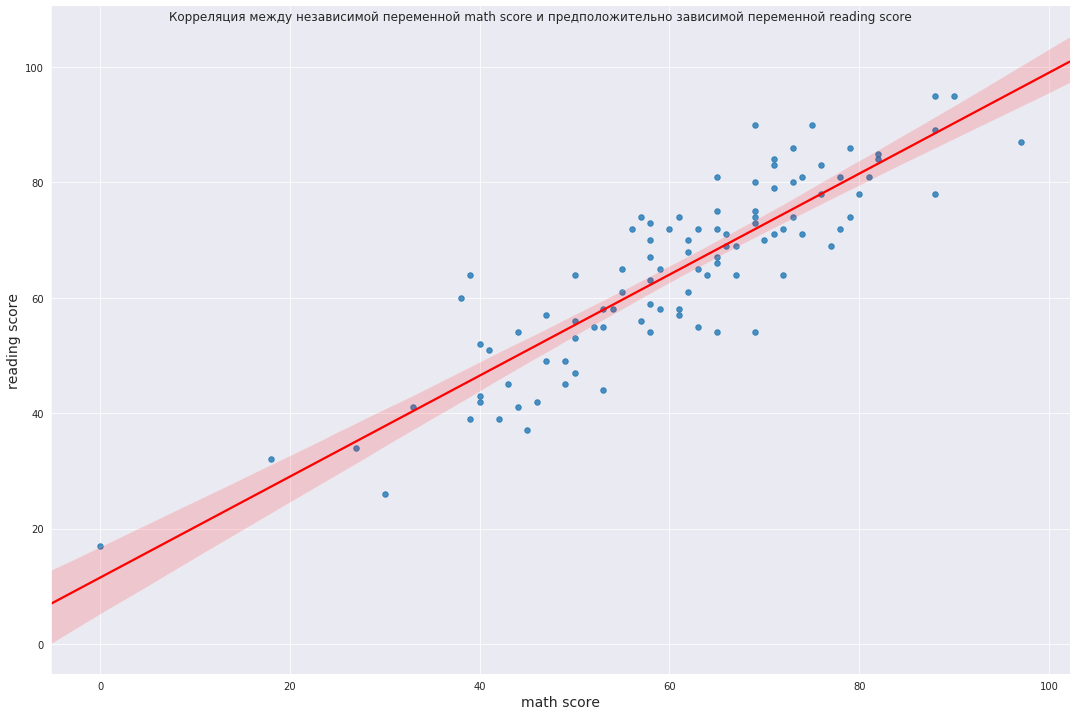

In [ ]:
Menu()

In [ ]:
df.shape

(1000, 8)